# Image Convolution

In [1]:
import matplotlib.pyplot as plt
import numpy as np
nt = plt.imread('night.JPEG')

In [2]:
nt.shape

(359, 638, 3)

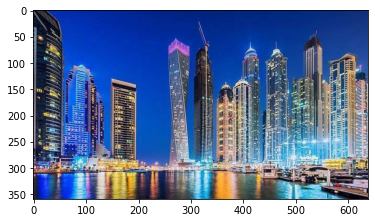

In [37]:
plt.imshow(nt)

In [6]:
# change the image from RGB to Gray
r, g, b = nt[:,:,0], nt[:,:,1], nt[:,:,2]
nt_gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

In [7]:
nt_gray.shape, nt_gray

((359, 638),
 array([[ 77.9105,  80.9102,  22.1441, ...,  43.9915,  43.9915,  43.9915],
        [140.9042,  85.9097,  64.1399, ...,  43.9915,  43.9915,  43.9915],
        [136.9046, 125.1338,  76.6656, ...,  44.9914,  44.9914,  44.9914],
        ...,
        [ 40.1469,  37.7881,  35.7883, ...,   4.8964,   5.7931,   8.8036],
        [ 38.902 ,  36.9022,  35.1304, ...,   8.2812,   5.3524,   5.1244],
        [ 39.7709,  36.7712,  34.7714, ...,  22.725 ,  20.0242,  16.9105]]))

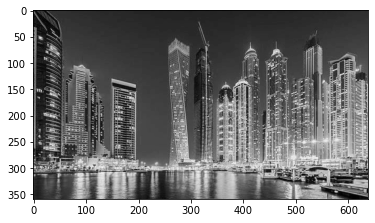

In [8]:
plt.imshow(nt_gray, cmap='gray')

In [15]:
# define the kernel to be convolved with the image
ker = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

In [16]:
# Now we do the convolution
import scipy
from scipy import signal
nt_convd = scipy.signal.convolve2d(nt_gray,ker,mode='same',boundary='symm')

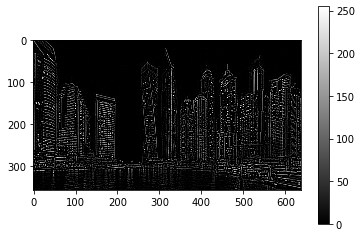

In [17]:
plt.imshow(nt_convd,cmap='gray',vmin=0, vmax=255)
plt.colorbar()

In [18]:
np.max(nt_convd), np.min(nt_convd)

(1317.7911, -1311.3342)

In [19]:
m, n = nt_gray.shape
nt_gray_padded = np.pad(nt_gray,((1,1),(1,1)))
nt_convd = np.zeros((m,n))
for i in range(m):
    for j in range(n):
        ic = i+1
        jc = j+1
        nt_convd[i,j] = np.sum(nt_gray_padded[ic-1:ic+2,jc-1:jc+2]*ker)

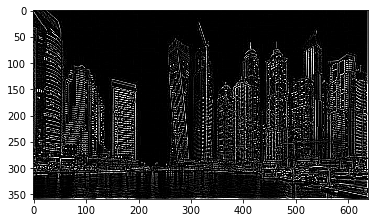

In [20]:
plt.imshow(nt_convd,cmap="gray",vmin=0, vmax=255)

In [21]:
ker_choices = {'Lap':np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),
              'ave':np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])/9,
              'Dxx':np.array([[-1, 2, -1], [-1, 2, -1], [-1, 2, -1]]),
              'Dyy':np.array([[-1, -1, -1], [2, 2, 2], [-1, -1, -1]]),
              'grad':np.array([[-2, -1, 0], [-1, 0, 1], [0, 1, 2]])}

In [22]:
ker_choices.keys()

dict_keys(['Lap', 'ave', 'Dxx', 'Dyy', 'grad'])

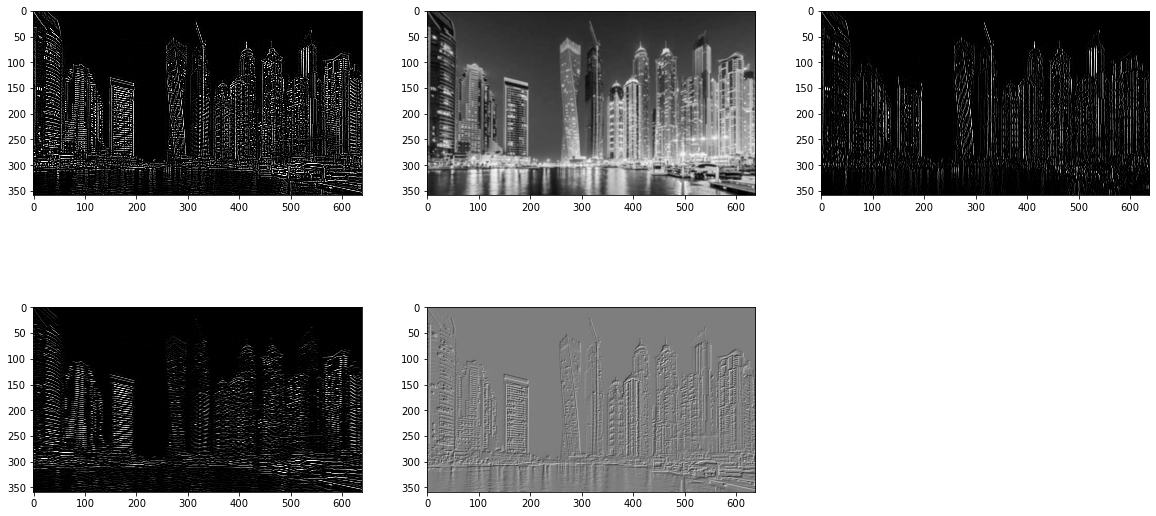

In [26]:
plt.figure(figsize=[20,10])
for i, key in enumerate(ker_choices.keys()):
    nt_convd = scipy.signal.convolve2d(nt_gray,ker_choices[key],mode='same',boundary='symm')
    plt.subplot(2,3,i+1)
    if i in [0,2,3]:
        plt.imshow(nt_convd,cmap="gray",vmin=0, vmax=255)
    else:
        plt.imshow(nt_convd,cmap="gray")

In [27]:
nt_convd = scipy.signal.convolve2d(nt_gray,ker_choices['grad'],mode='same',boundary='symm')

(<matplotlib.image.AxesImage at 0x21471f04460>,
 array([[-2, -1,  0],
        [-1,  0,  1],
        [ 0,  1,  2]]))

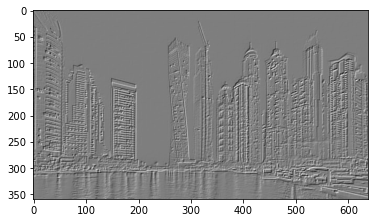

In [29]:
plt.imshow(nt_convd,cmap="gray"), ker_choices['grad']

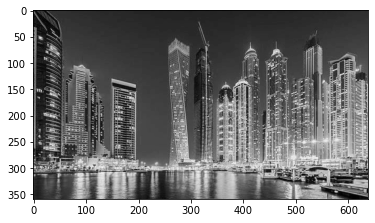

In [30]:
plt.imshow(nt_gray,cmap="gray")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


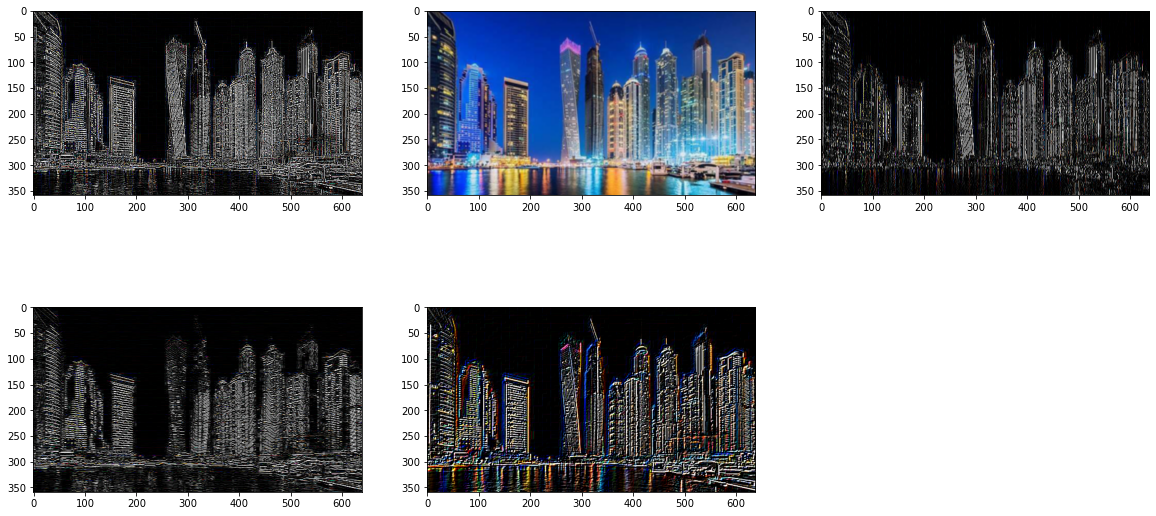

In [59]:
plt.figure(figsize=[20,10])
for i, key in enumerate(ker_choices.keys()):
    r_convd = scipy.signal.convolve2d(r,ker_choices[key],mode='same',boundary='symm')
    g_convd = scipy.signal.convolve2d(g,ker_choices[key],mode='same',boundary='symm')
    b_convd = scipy.signal.convolve2d(b,ker_choices[key],mode='same',boundary='symm')
    nt_rgb = np.array([r_convd.T, g_convd.T, b_convd.T]).T
    plt.subplot(2,3,i+1)
    plt.imshow(nt_rgb.astype(int))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


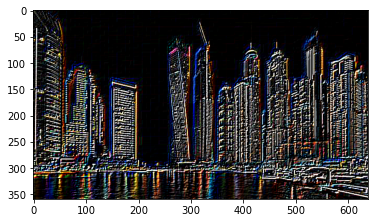

In [39]:
plt.imshow(nt_rgb)

In [41]:
ker_choices['ave']

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [42]:
r_convd = scipy.signal.convolve2d(r,ker_choices['ave'],mode='same',boundary='symm')
g_convd = scipy.signal.convolve2d(g,ker_choices['ave'],mode='same',boundary='symm')
b_convd = scipy.signal.convolve2d(b,ker_choices['ave'],mode='same',boundary='symm')

In [57]:
nt_rgb = np.array([r_convd.T, g_convd.T, b_convd.T]).T.astype(int)

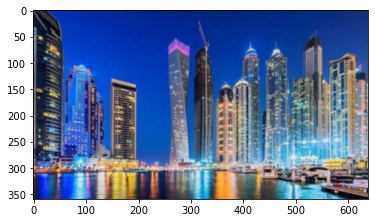

In [58]:
plt.imshow(nt_rgb)